In [1]:
import pandas as pd

In [22]:
df = pd.read_excel("../data/raw/skonsultowana_lista przypadków_Th_LS.xlsx")

In [35]:
df_2 = pd.read_excel("../data/raw/Zanonimizowane_całość urazy kręgosłupa 2014-2020 (1).xlsx")

In [23]:
df.head()

,I.I.,Mężczyzna,low-energy trauma,high-energy trauma,brak wywiadu urazowego,RTG,Th,LS,Data badania,TK,...,C,SD,pre-DISH ze złamaniem,pre-DISH poza złamaniem,DISH ze złamaniem,DISH poza złamaniem,ZZSK,inne,charakteryzacja,Uwagi
0,MM M 62,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2020-05-06,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SA K 46,0.0,1.0,NaN,NaN,0.0,NaN,NaN,NaT,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df.columns

Index(['I.I.', 'Mężczyzna', 'low-energy trauma', 'high-energy trauma ',
       'brak wywiadu urazowego', 'RTG', 'Th', 'LS', 'Data badania', 'TK',
       'TK multitrauma', 'Th.1', 'LS.1', 'klp C-', 'klp C+', 'jb C-', 'jb C+',
       'SOR', 'Data badania.1', 'Poziom', 'A0', 'A1', 'A2', 'A3', 'A4', 'B1',
       'B2', 'B3', 'C', 'SD', 'pre-DISH ze złamaniem',
       'pre-DISH poza złamaniem', 'DISH ze złamaniem', 'DISH poza złamaniem',
       'ZZSK', 'inne', 'charakteryzacja ', 'Uwagi'],
      dtype='object')

In [36]:
columns_of_interest = ['I.I.', 'Poziom', 'A0', 'A1', 'A2', 'A3', 'A4', 'B1', 'B2', 'B3', 'C', 'Mężczyzna']
df_trimmed = df[columns_of_interest].copy()
df_v2_trimmed = df_2[columns_of_interest].copy()
records = []
current_traumas = []
current_gender = None
current_ii = None

df_trimmed = pd.concat([df_trimmed, df_v2_trimmed], ignore_index=True, axis=0)


In [37]:
df_trimmed.head()

,I.I.,Poziom,A0,A1,A2,A3,A4,B1,B2,B3,C,Mężczyzna
0,MM M 62,L1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
1,NaN,L2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,L4,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,L5,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SA K 46,Th3,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0


In [38]:
for _, row in df_trimmed.iterrows():
    if pd.notna(row['I.I.']):
        if current_traumas:
            records.append({
                "I.I": f"{current_ii}",
                "is_man": current_gender,
                "traumas": current_traumas
            })
        current_gender = bool(row['Mężczyzna'])
        current_traumas = []
        current_ii = row['I.I.']

    if pd.notna(row['Poziom']):
        level = row['Poziom']
        for trauma_type in ['A0', 'A1', 'A2', 'A3', 'A4', 'B1', 'B2', 'B3', 'C']:
            if pd.notna(row[trauma_type]):
                current_traumas.append((level, trauma_type))

if current_traumas:
    records.append({
        "I.I": f"I.I. {current_ii}",
        "is_man": current_gender,
        "traumas": current_traumas
    })


In [39]:
records_df = pd.DataFrame(records)
records_df.head(10)

,I.I,is_man,traumas
0,MM M 62,True,"[(L1, A4), (L2, A1), (L4, A1), (L5, A1)]"
1,SA K 46,False,"[(Th3, B1)]"
2,PG M 75,True,"[(Th10, A1), (Th11, A1), (Th12, A3), (Th11/Th1..."
3,ZR M 79,True,"[(Th11/Th12, B3), (L1, A0), (L2, A0), (L3, A0)..."
4,"MM K 1, 2 35",False,"[(Th6, A1)]"
5,RM M 40,True,"[(Th8/Th9 , B3)]"
6,CS K 97,False,"[(Th6, A1), (Th7/Th8, B2), (Th8, A4), (Th10, A..."
7,JJ K 25,False,"[(Th11, A3), (Th10/Th11, B2)]"
8,NJ M 57,True,"[(Th12/L1, C)]"
9,SW M 47,True,"[(Th10, A1), (Th11, A1), (L1, A1), (Th10/Th11,..."


In [40]:
records_df.tail(10)

,I.I,is_man,traumas
377,L.A.,False,"[(L1/L2, B2), (L2, A4), (L3, A0), (L5, A1)]"
378,F.J.,True,"[(Th12/L1, B2), (L1, A4)]"
379,G.A.,True,"[(Th2, A1), (Th3, A3), (Th4, A4), (Th5, A1), (..."
380,J.J.,False,"[(Th11, A3), (Th10/Th11, B2)]"
381,P.Ł.,True,"[(Th1, A0), (Th4, A0), (Th4-Th7, B1), (Th6/Th7..."
382,D.M.,True,"[(L1, A0), (L2, A0), (L4/L5, C), (L5, A4)]"
383,S.W.,True,"[(Th10, A1), (Th11, A1), (L1, A1), (Th10/Th11,..."
384,N.J.,True,"[(Th12/L1, C)]"
385,N.W.,True,"[(Th2/Th3, B2), (Th3, A1), (L5, A0)]"
386,I.I. D.J.,True,"[(L3, A1)]"


In [41]:
len(records_df)

387

In [42]:
records_df.dtypes

I.I        object
is_man       bool
traumas    object
dtype: object

In [44]:
all_pairs = records_df.explode('traumas')['traumas']
all_pairs

0           (L1, A4)
0           (L2, A1)
0           (L4, A1)
0           (L5, A1)
1          (Th3, B1)
           ...      
384     (Th12/L1, C)
385    (Th2/Th3, B2)
385        (Th3, A1)
385         (L5, A0)
386         (L3, A1)
Name: traumas, Length: 658, dtype: object

In [50]:
from collections import Counter
import re

In [56]:
first_elements = Counter()

for first, _ in all_pairs:
    segments = re.split(r"[/\-]", first)
    for segment in segments:
        first_elements[segment] += 1
second_elements = Counter([x[1] for x in all_pairs])


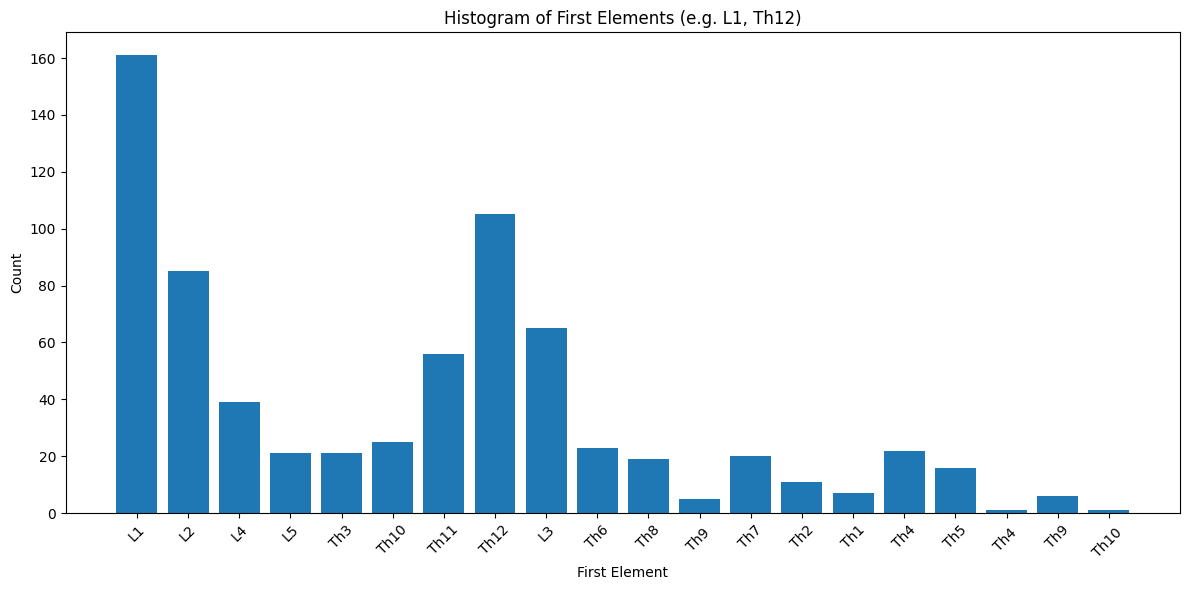

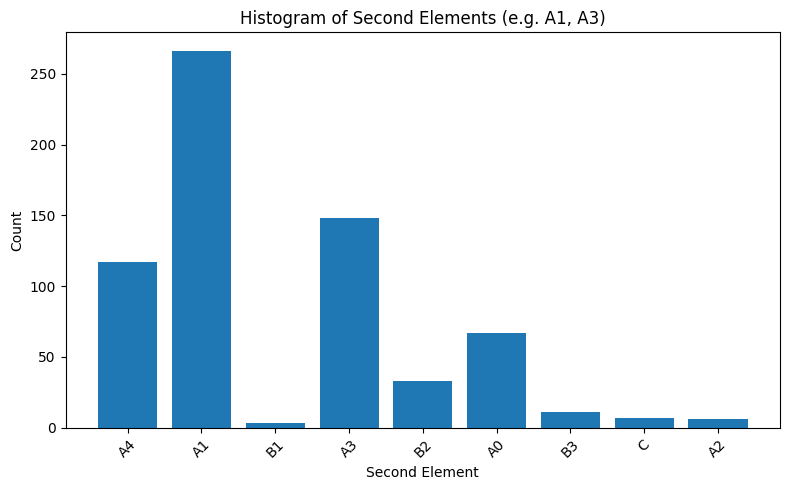

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(first_elements.keys(), first_elements.values())
plt.title("Histogram of First Elements (e.g. L1, Th12)")
plt.xlabel("First Element")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(second_elements.keys(), second_elements.values())
plt.title("Histogram of Second Elements (e.g. A1, A3)")
plt.xlabel("Second Element")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()